# 1. Reading And Understanding The Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from datetime import timedelta
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
employee_survey_data = pd.read_csv('.../employee_survey_data.csv')
general_data = pd.read_csv('.../general_data.csv')
start_time = pd.read_csv('.../in_time.csv')
manager_survey_data = pd.read_csv('.../manager_survey_data.csv')
finish_time = pd.read_csv('.../out_time.csv')

In [3]:
print(general_data.head())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0

In [4]:
print(employee_survey_data.head())

   EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0


In [5]:
print(manager_survey_data.head())

   EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3


In [6]:
print(start_time.head())

   Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   
1  2015-01-09 09:4

In [7]:
print(finish_time.head())

   Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   
1  2015-01-09 16:5

In [8]:
print('General data shape:', general_data.shape)
print('Employee survey data shape:', employee_survey_data.shape)
print('Manager survey data shape:', manager_survey_data.shape)
print('Start working time data shape', start_time.shape)
print('End working time data shape:', finish_time.shape)

General data shape: (4410, 24)
Employee survey data shape: (4410, 4)
Manager survey data shape: (4410, 3)
Start working time data shape (4410, 262)
End working time data shape: (4410, 262)


There are 4410 employee records in all of the datasets. I will combine them to get more accurate results.

There are columns named Unnamed: 0 in start_time and finish_time files. I will convert to EmployeeID for clearity, because I will combine the files later.

In [9]:
# Firstly, change column name Unnamed: 0 to EmployeeID in start and end time datasets.
start_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
finish_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
print('Number of unique values of EmployeeID in start time dataset:', start_time.EmployeeID.nunique())
print('Number of unique values of EmployeeID in finish time dataset:', finish_time.EmployeeID.nunique())

Number of unique values of EmployeeID in start time dataset: 4410
Number of unique values of EmployeeID in finish time dataset: 4410


I will set the column named EmployeeID in all files so that I can merge them.

In [10]:
general_data.set_index('EmployeeID', inplace=True)
employee_survey_data.set_index('EmployeeID', inplace=True)
manager_survey_data.set_index('EmployeeID', inplace=True)
start_time.set_index('EmployeeID', inplace=True)
finish_time.set_index('EmployeeID', inplace=True)

Firstly, I will combine the files of general_data, employee_survey_data, manager_survey_data. I need to change time files before merging.

In [11]:
main_data = pd.concat([general_data, employee_survey_data, manager_survey_data], axis = 1)
print(main_data.columns.values)

['Age' 'Attrition' 'BusinessTravel' 'Department' 'DistanceFromHome'
 'Education' 'EducationField' 'EmployeeCount' 'Gender' 'JobLevel'
 'JobRole' 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'Over18'
 'PercentSalaryHike' 'StandardHours' 'StockOptionLevel'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'YearsAtCompany'
 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'EnvironmentSatisfaction' 'JobSatisfaction' 'WorkLifeBalance'
 'JobInvolvement' 'PerformanceRating']


I will calculate total working hours as below from working times. After that, I can calculate overtime as well. Finally, I can merge all files by adding WorkingHours and Overtime columns to our main_data.

In [12]:
start_time = start_time.apply(pd.to_datetime)
finish_time = finish_time.apply(pd.to_datetime)
main_data['WorkingHours'] = (finish_time - start_time).mean(axis=1)
main_data['WorkingHours'] = main_data['WorkingHours'] / np.timedelta64(1, 's')
main_data['Overtime'] = main_data['WorkingHours'] - main_data['StandardHours'] * 3600

In [13]:
print(main_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 30 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-null int64
TotalWorkingYears          4401 non-n

There are some null values in the dataset. The values under Non_null column are not all 4410.
On the other hand, there are categorical variables that should be converted to numerical variables.

# 2. Cleaning The Data

In [14]:
print('\033[1mNULL VALUES\033[0m\n'+ str(main_data.isnull().sum()))

NULL VALUES
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
WorkingHours                0
Overtime                    0
dtype: int64


There are null values that should be handled in the dataset. Firstly, I will visulize them, so that I can decide to fill them either with median or mean etc..

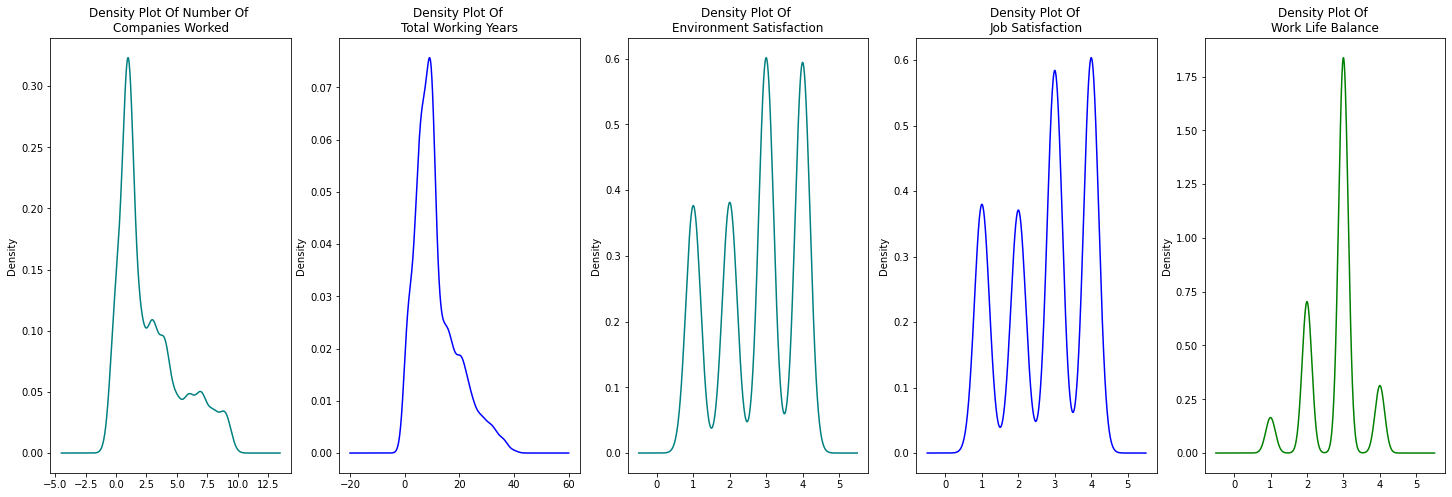

In [15]:
plt.figure(figsize=(25,8))

plt.subplot(1,5,1)
main_data['NumCompaniesWorked'].plot(kind='density', color='teal')
plt.title('Density Plot Of Number Of \nCompanies Worked')

plt.subplot(1,5,2)
main_data['TotalWorkingYears'].plot(kind='density', color='blue')
plt.title('Density Plot Of \nTotal Working Years')

plt.subplot(1,5,3)
main_data['EnvironmentSatisfaction'].plot(kind='density', color='teal')
plt.title('Density Plot Of \nEnvironment Satisfaction')

plt.subplot(1,5,4)
main_data['JobSatisfaction'].plot(kind='density', color='blue')
plt.title('Density Plot Of \nJob Satisfaction')

plt.subplot(1,5,5)
main_data['WorkLifeBalance'].plot(kind='density', color='green')
plt.title('Density Plot Of \nWork Life Balance')

plt.show()

The values in these columns are not normally distributed. It's better to use median value to fill the null values.

In [16]:
null = ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
for i in null:
    main_data[i] = main_data[i].fillna(main_data[i].median())

In [17]:
print('\033[1mNULL VALUES\033[0m\n'+ str(main_data.isnull().values.any()))

NULL VALUES
False


There is not any null values left in the dataset.

I will check the number of unique values in our dataset.

In [18]:
for i in main_data:
    print("data[\'" + i + "\']:", main_data[i].nunique())

data['Age']: 43
data['Attrition']: 2
data['BusinessTravel']: 3
data['Department']: 3
data['DistanceFromHome']: 29
data['Education']: 5
data['EducationField']: 6
data['EmployeeCount']: 1
data['Gender']: 2
data['JobLevel']: 5
data['JobRole']: 9
data['MaritalStatus']: 3
data['MonthlyIncome']: 1349
data['NumCompaniesWorked']: 10
data['Over18']: 1
data['PercentSalaryHike']: 15
data['StandardHours']: 1
data['StockOptionLevel']: 4
data['TotalWorkingYears']: 40
data['TrainingTimesLastYear']: 7
data['YearsAtCompany']: 37
data['YearsSinceLastPromotion']: 16
data['YearsWithCurrManager']: 18
data['EnvironmentSatisfaction']: 4
data['JobSatisfaction']: 4
data['WorkLifeBalance']: 4
data['JobInvolvement']: 4
data['PerformanceRating']: 2
data['WorkingHours']: 4410
data['Overtime']: 4410


The number of unique values in the columns of EmployeeCount, Over18, StandardHours is just 1. All values are same. I will remove these columns.

In [19]:
main_data.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [20]:
print(main_data.duplicated().sum())

0


There is not any duplicated values in the dataset.

# 3. Exploratory Data Analysis

Firstly, it is better to see attriton level in the dataset. The number of people who want to leave the company, and the number of people who are satisfied to work.

             No  Yes
Attrition  3699  711


<Figure size 432x288 with 0 Axes>

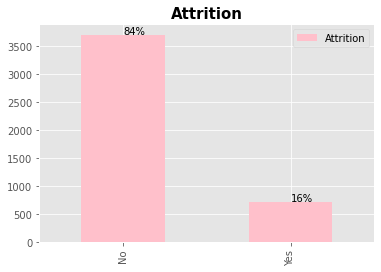

In [21]:
total = len(main_data['Attrition'])
Attrition = pd.DataFrame(main_data['Attrition'].value_counts())
print(Attrition.T)
plt.figure(figsize=(6,4))
plt.style.use('ggplot')
ax = Attrition.plot(kind='bar', color='pink')
plt.title('Attrition', fontweight='bold', fontsize=15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10 , '{:.0%}'.format(height/total))
plt.show()

16% of employess are not satisfied. It's not that small number for the company.

In [22]:
main_data['AgeGroups'] = pd.cut(main_data['Age'], range(10, 70, 10))

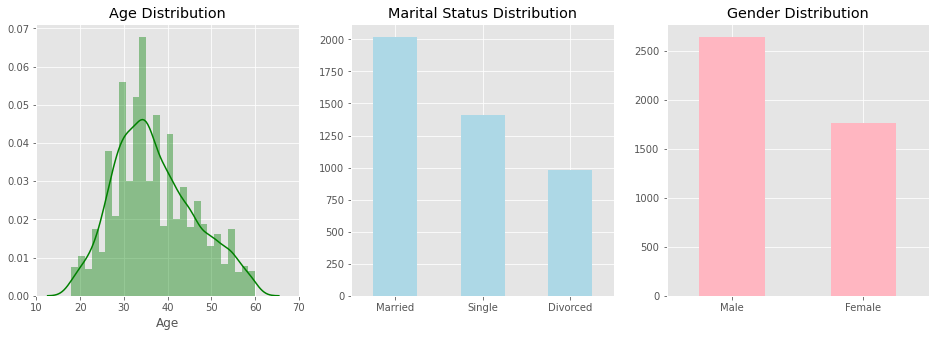

In [23]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.distplot(main_data['Age'], color='green')
plt.xlim(10,70)
plt.title('Age Distribution')

plt.subplot(1,3,2)
main_data['MaritalStatus'].value_counts().plot(kind='bar', color='lightblue')
plt.xticks(rotation=0)
plt.title('Marital Status Distribution')

plt.subplot(1,3,3)
main_data['Gender'].value_counts().plot(kind='bar', color='lightpink')
plt.xticks(rotation=0)
plt.title('Gender Distribution')

plt.show()

* Age : Age group of employees is usually 30 - 40.
* Marital Status : The number of married people is highest, while the divorced is lowest.
* Gender : Male population is higher than female.

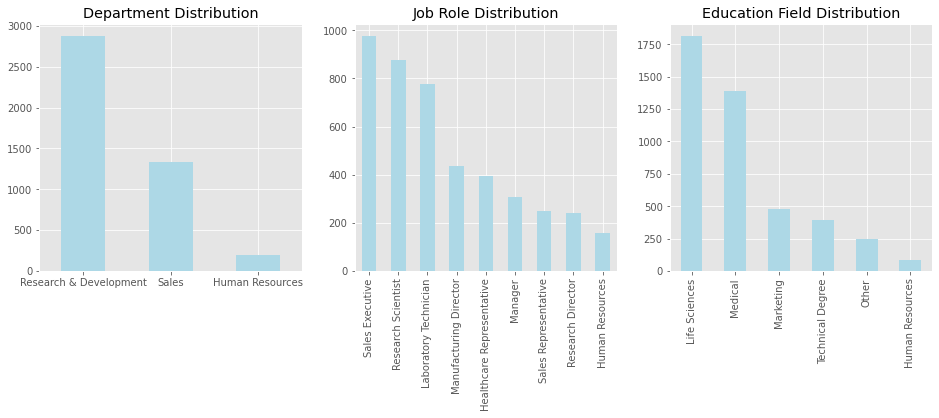

In [24]:
plt.figure(figsize=(16,10))

plt.subplot(2,3,4)
main_data['Department'].value_counts().plot(kind='bar', color='lightblue')
plt.xticks(rotation=0)
plt.title('Department Distribution')

plt.subplot(2,3,5)
main_data['JobRole'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Job Role Distribution')

plt.subplot(2,3,6)
main_data['EducationField'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Education Field Distribution')

plt.show()

* Department : There are many people working in R&D department. The number of people works in HR is the lowest.
* Job Role: There are so many sales executive in the company. Sales department mostly include Sales Executives.
* Education Field: There are so many people in the company who studied Life Sciences.

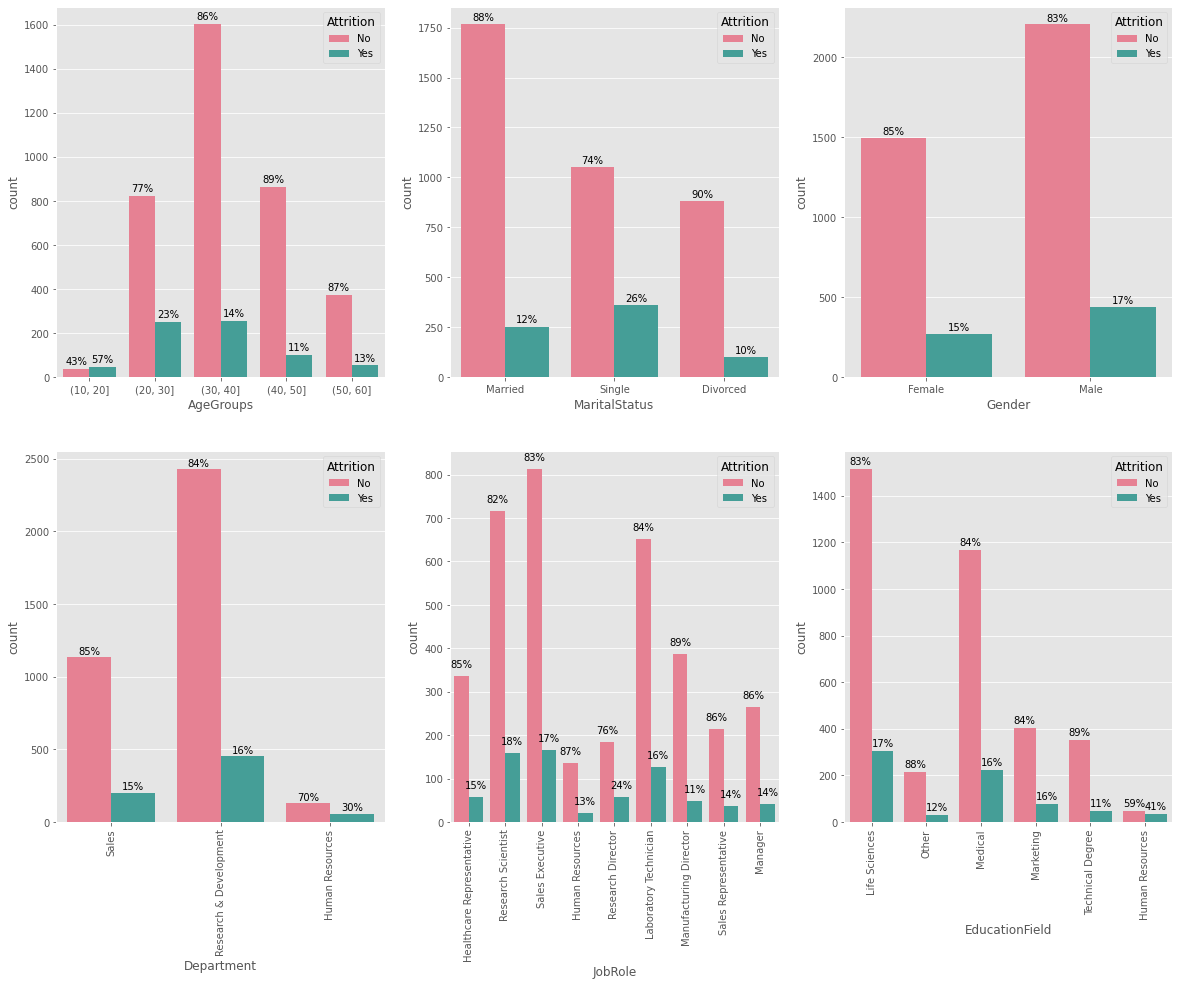

In [25]:
graphs = ['AgeGroups', 'MaritalStatus', 'Gender', 'Department', 'JobRole', 'EducationField']
plt.figure(figsize=(20,15))
for index, item in enumerate(graphs):
    plt.subplot(2,3,index+1)
    ax = sns.countplot(x=item, hue='Attrition', data=main_data, palette='husl')
    if index+1>3: plt.xticks(rotation=90)
    index = int(len(ax.patches)/2)
    for left,right in zip(ax.patches[:index], ax.patches[index:]):
        left_height = left.get_height()
        right_height = right.get_height()
        total = left_height + right_height
        ax.text(left.get_x() + left.get_width()/2., left_height + 20, '{:.0%}'.format(left_height/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., right_height + 20, '{:.0%}'.format(right_height/total), ha="center")
plt.show()  

These graphs show the Attrition level by Age, Marital Status, Gender, Department, Job Role, Education Field.

Age Group : 23% of 20-30 age group wants to leave the company.

Marital Status : 26% of single people wants to leave the company.

Gender : 17% of male employess wants to leave the company.

Department : 16% of R&D department wants to leave the company.

Job Role: 24% of Research Directors wants to leave the company.

Education Field : 41% of Human Resources wants to leave the company. This is very high.

In [26]:
main_data = main_data.drop('AgeGroups', axis=1)

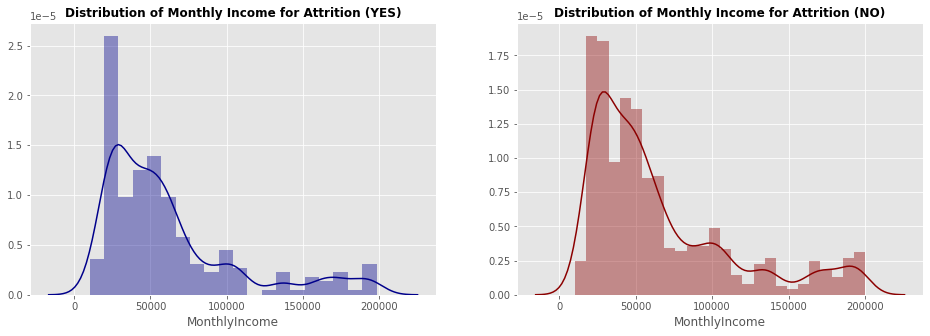

In [27]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(main_data[main_data['Attrition']=='Yes']['MonthlyIncome'], color='darkblue')
plt.title('Distribution of Monthly Income for Attrition (YES)', fontsize=12, fontweight='bold')

plt.subplot(1,2,2)
sns.distplot(main_data[main_data['Attrition']=='No']['MonthlyIncome'], color='darkred')
plt.title('Distribution of Monthly Income for Attrition (NO)', fontsize=12, fontweight='bold')

plt.show()

The income of employees who want to leave the company is lower.

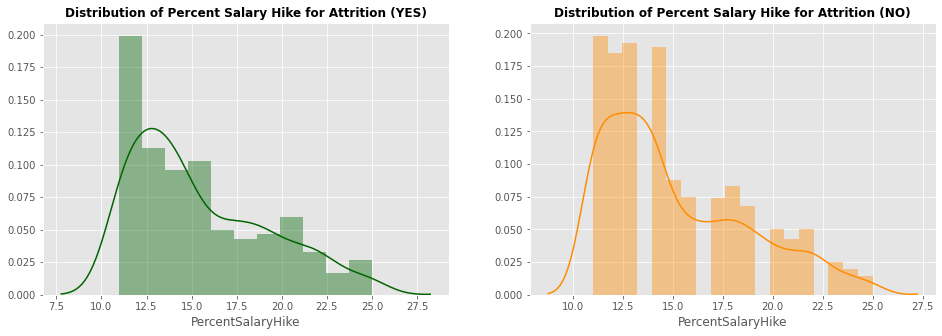

In [28]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(main_data[main_data['Attrition']=='Yes']['PercentSalaryHike'], color='darkgreen')
plt.title('Distribution of Percent Salary Hike for Attrition (YES)', fontsize=12, fontweight='bold')

plt.subplot(1,2,2)
sns.distplot(main_data[main_data['Attrition']=='No']['PercentSalaryHike'], color='darkorange')
plt.title('Distribution of Percent Salary Hike for Attrition (NO)', fontsize=12, fontweight='bold')

plt.show()

Percent Salary Hike of employees who want to leave the company is lower.

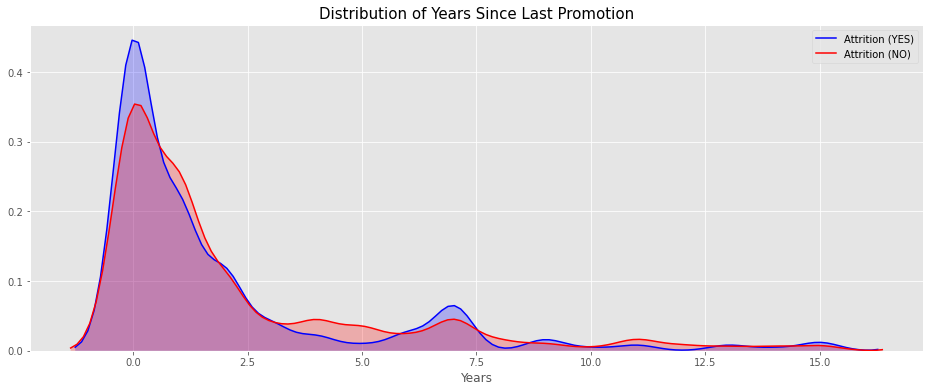

In [29]:
plt.figure(figsize=(16,6))

sns.kdeplot(main_data['YearsSinceLastPromotion'][main_data.Attrition=='Yes'], color='blue', shade=True)
sns.kdeplot(main_data['YearsSinceLastPromotion'][main_data.Attrition=='No'], color='red', shade=True)
plt.title('Distribution of Years Since Last Promotion', fontsize=15)
plt.legend(['Attrition (YES)', 'Attrition (NO)'])
plt.xlabel('Years', fontsize=12)

plt.show()

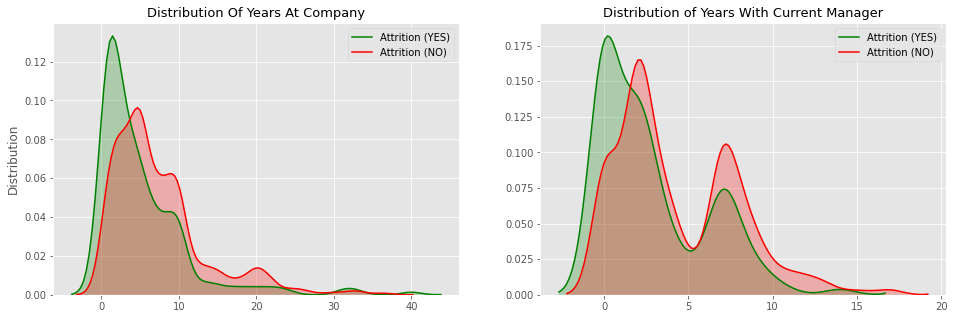

In [30]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.kdeplot(main_data['YearsAtCompany'][main_data.Attrition=='Yes'], shade=True, color='green')
sns.kdeplot(main_data['YearsAtCompany'][main_data.Attrition=='No'], shade=True, color='red')
plt.title('Distribution Of Years At Company', fontsize=13)
plt.ylabel('Distribution')
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(1,2,2)
sns.kdeplot(main_data['YearsWithCurrManager'][main_data.Attrition=='Yes'], shade=True, color='green')
sns.kdeplot(main_data['YearsWithCurrManager'][main_data.Attrition=='No'], shade=True, color='red')
plt.title('Distribution of Years With Current Manager', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])


plt.show()

If employees spend more time in the company, attrition rate is lower. People don't want to leave the company after spending long time in the same company.

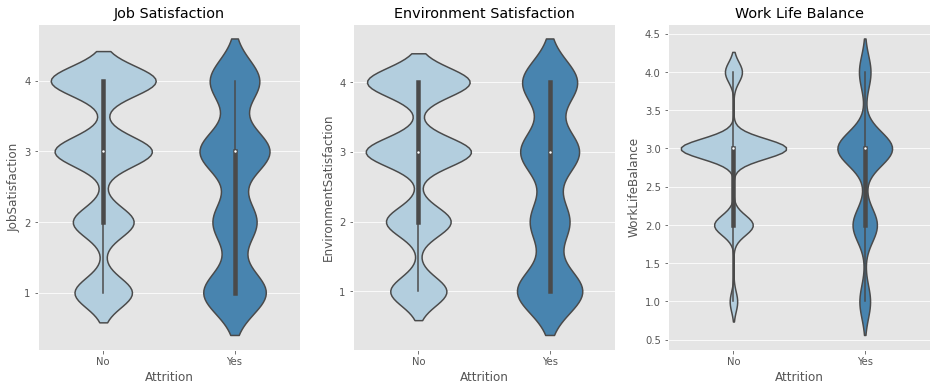

In [31]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.violinplot(data=main_data, x='Attrition', y='JobSatisfaction', palette='Blues')
plt.title('Job Satisfaction')

plt.subplot(1,3,2)
sns.violinplot(data=main_data, x='Attrition', y='EnvironmentSatisfaction', palette='Blues')
plt.title('Environment Satisfaction')

plt.subplot(1,3,3)
sns.violinplot(data=main_data, x='Attrition', y='WorkLifeBalance', palette='Blues')
plt.title('Work Life Balance')

plt.show()

Employees who want to quit their jobs are not quite satisfied with their jobs. Work life balance is lower.

# 4. Data Preparation

### Outliers

Logistic regression is sensitive to outliers. I will check for outliers in the dataset.

In [32]:
numerical_columns = main_data.select_dtypes(exclude='object').columns
numerical_data = main_data[numerical_columns]
categorical_columns = main_data.select_dtypes(include='object').columns
categorical_data = main_data[categorical_columns]

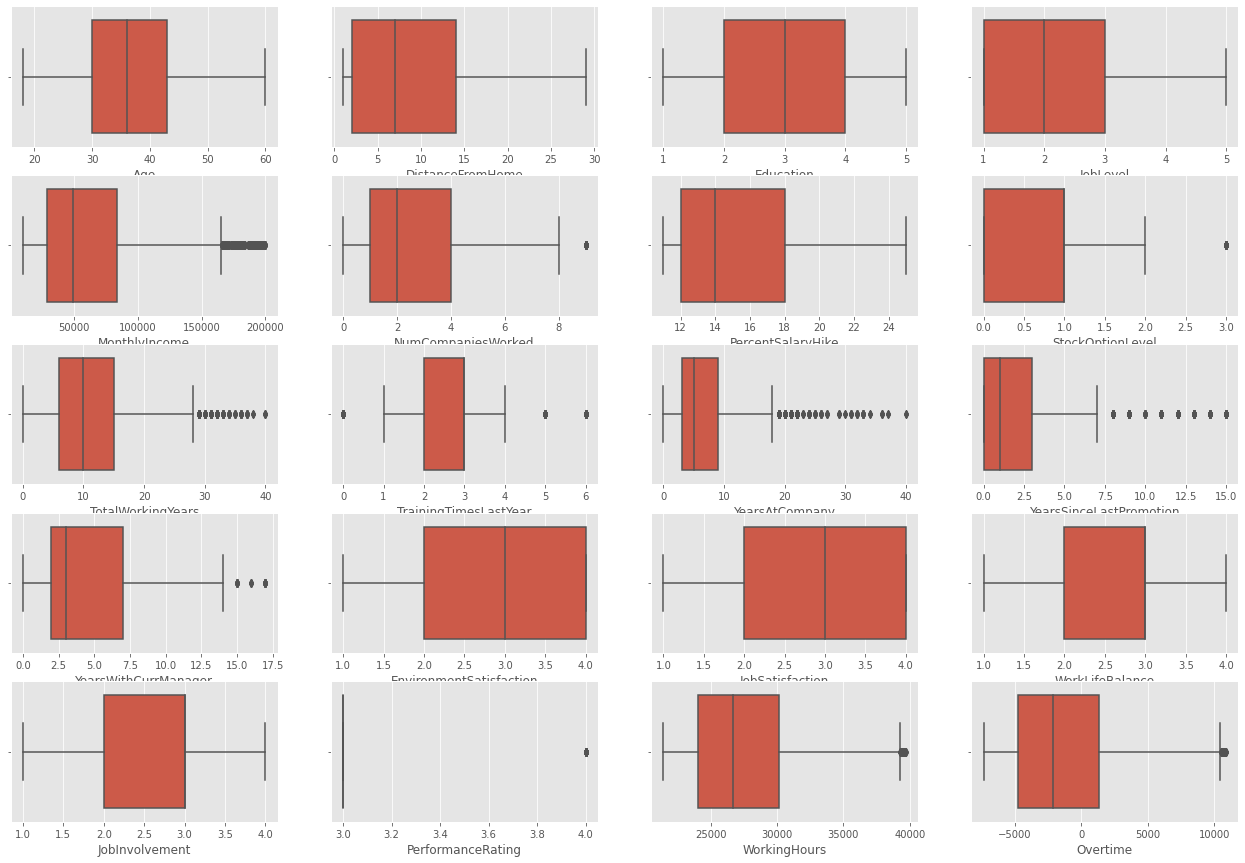

In [35]:
plt.figure(figsize=(22,15))
for index, item in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, index)
    sns.boxplot(main_data[item])
plt.show() 

There are outliers in the dataset. I will apply log transformation to these variables. Log transformation de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution.

In [36]:
columns = ['MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
           'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating', 'WorkingHours']
main_data[columns] = (main_data[columns] + 1).transform(np.log)

### Converting to numerical variables

I will convert categorical variables to numerical variables. Categorical variables are not ordinal. For this reason, I will apply OneHotEncoder.

In [37]:
dummies = pd.get_dummies(main_data[categorical_columns], drop_first = True)
main_data = pd.concat([main_data, dummies], axis = 1)
main_data.drop(categorical_columns, axis = 1, inplace = True)

In [38]:
X = main_data.drop('Attrition_Yes', axis=1)
y = main_data['Attrition_Yes']

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = X.columns
main_data[columns] = scaler.fit_transform(main_data[columns])

### Checking Multicollinearity

Multicollinearity occurs when the model includes multiple factors that are correlated to each other. Logistic regression requires there to be little or no multicollinearity among the independent variables. This means that the independent variables should not be too highly correlated with each other.

I will check the correlation between the variables visually and with the VIF value. I will drop the variables with VIF above 5.

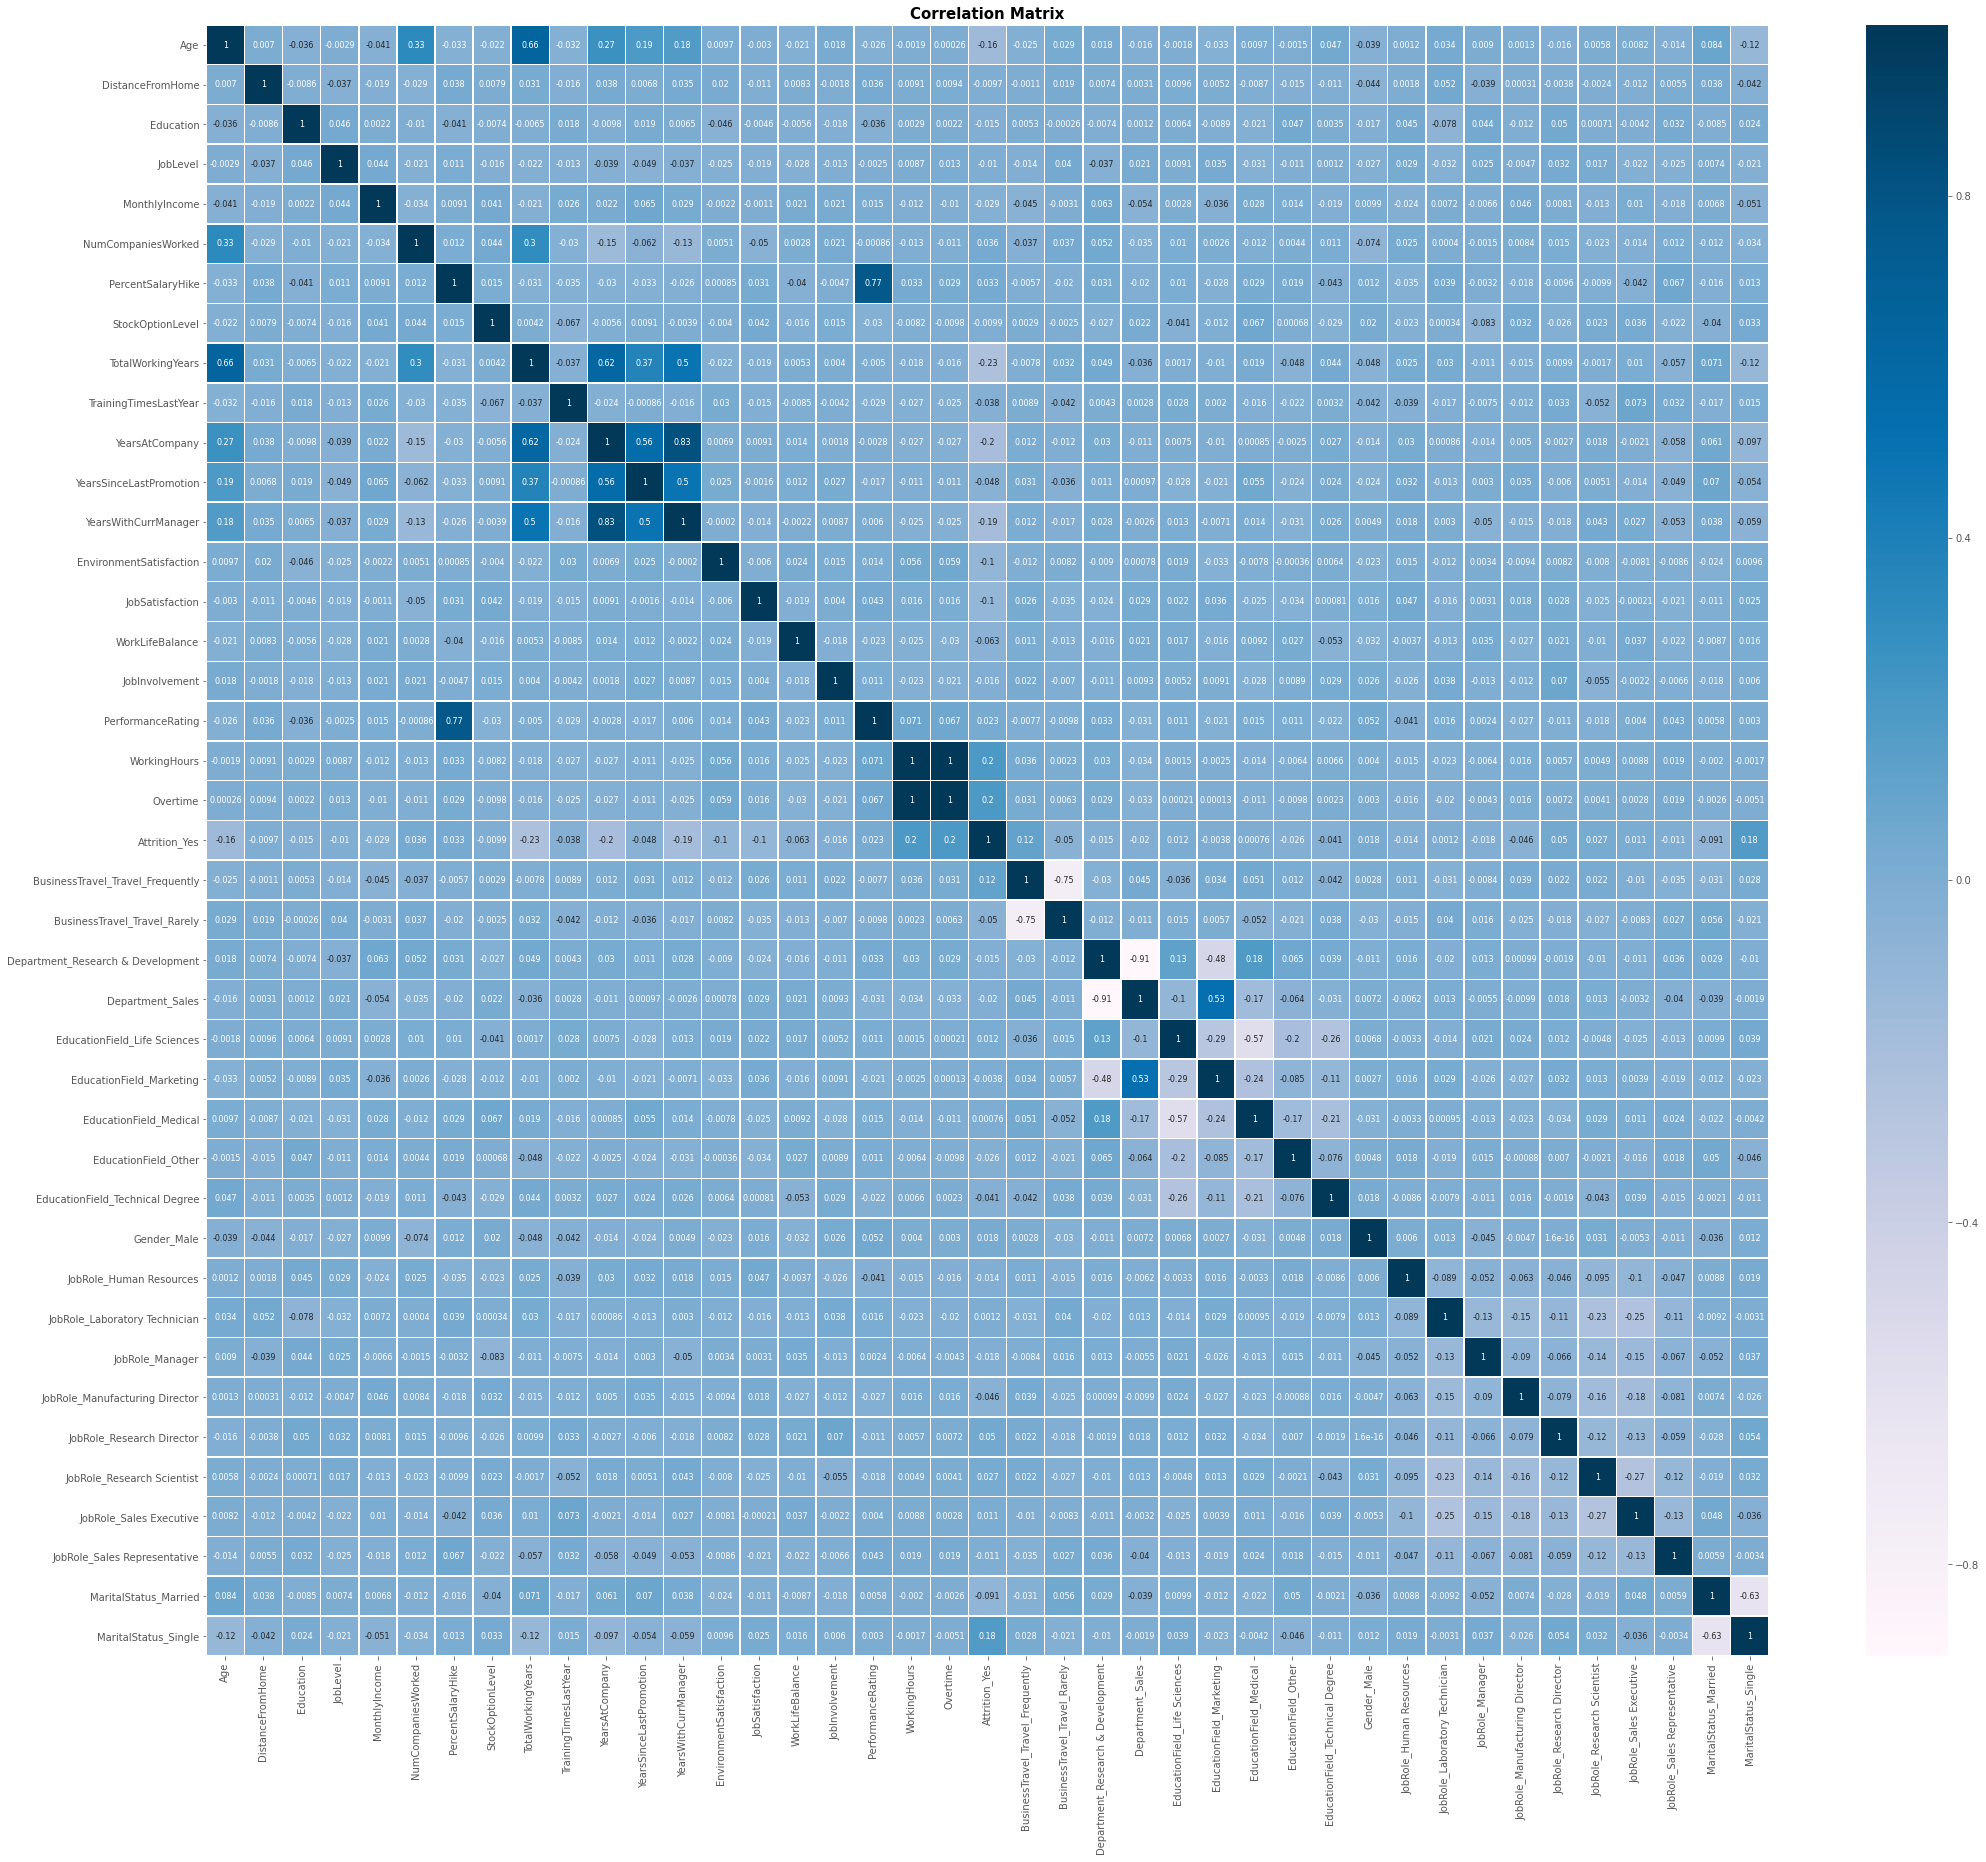

In [40]:
plt.rcParams['figure.figsize'] = [35,30]
sns.heatmap(main_data.corr(), cmap='PuBu', annot=True, linewidths=.5, annot_kws={'size':8})
plt.title('Correlation Matrix', fontweight='bold', fontsize='15')
plt.show()

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["variables"] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
for index,column in enumerate(X.columns):
    print(index, column, vif['vif'][index])
    if vif['vif'][index]>5:
        vif = vif.drop([index], axis=0)

0 Age 33.664436882344816
1 DistanceFromHome 2.3358850912727203
2 Education 9.347385743069973
3 JobLevel 4.592997389141047
4 MonthlyIncome 276.71527726087726
5 NumCompaniesWorked 5.229152228856502
6 PercentSalaryHike 46.75258952840781
7 StockOptionLevel 2.197915138764849
8 TotalWorkingYears 38.97370574124281
9 TrainingTimesLastYear 12.68319803497483
10 YearsAtCompany 31.49108499308372
11 YearsSinceLastPromotion 2.939700301938075
12 YearsWithCurrManager 12.406270372329594
13 EnvironmentSatisfaction 7.389160562854396
14 JobSatisfaction 7.320852580511856
15 WorkLifeBalance 16.761221764442865
16 JobInvolvement 16.025524331266222
17 PerformanceRating 800.4830989464144
18 WorkingHours 966.4691801383186
19 Overtime 1.28824409111418
20 BusinessTravel_Travel_Frequently 2.9217914098839795
21 BusinessTravel_Travel_Rarely 8.188043298862235
22 Department_Research & Development 28.445254351243378
23 Department_Sales 14.28261195423292
24 EducationField_Life Sciences 40.941401759504984
25 EducationFiel

In [42]:
print(list(vif['variables']))

['DistanceFromHome', 'JobLevel', 'StockOptionLevel', 'YearsSinceLastPromotion', 'Overtime', 'BusinessTravel_Travel_Frequently', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single']


# 5. Building The Model

In [43]:
columns = list(vif['variables'])
data = main_data[columns]
data = pd.concat([data, main_data['Attrition_Yes']], axis=1)

In [44]:
from sklearn.model_selection import train_test_split
X = data.drop('Attrition_Yes', axis=1)
y = data ['Attrition_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [45]:
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train, y_train)
lrpred = lr.predict(X_test)

# 6. Evaluating The Model

In [46]:
print('Accuracy score of Logistic Regression:' + str(accuracy_score(y_test,lrpred)))
print('Confusion Matrix\n' + str(confusion_matrix(y_test, lrpred)))

Accuracy score of Logistic Regression:0.8522212148685403
Confusion Matrix
[[918  17]
 [146  22]]


Logistic Regression predicted 146 False Negative values. 146 people are actually want to quit their jobs, but the model says they want to stay. This is quite important, because we don't want to lose them in the company. Other models can be used on this dataset.

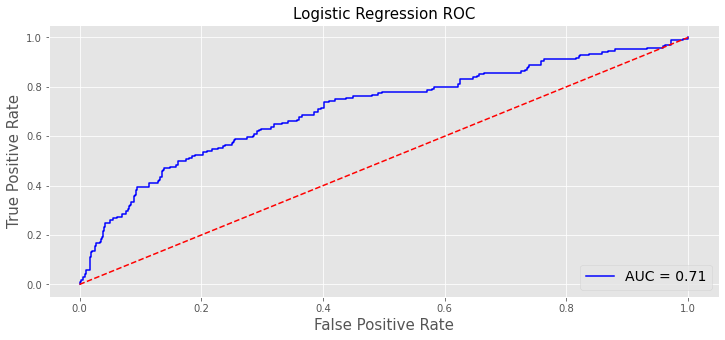

In [47]:
plt.figure(figsize=(12,5))

lrprob = lr.predict_proba(X_test)
lr_pred = lrprob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Logistic Regression ROC', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()

In [48]:
from sklearn.metrics import classification_report
print('Logistic Regression\n',classification_report(y_test, lrpred))

Logistic Regression
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       935
           1       0.56      0.13      0.21       168

    accuracy                           0.85      1103
   macro avg       0.71      0.56      0.57      1103
weighted avg       0.82      0.85      0.81      1103

